In [1]:
# import load_iris function from datasets module
# convention is to import modules instead of sklearn as a whole
from sklearn.datasets import load_iris
import numpy as np

In [2]:
# save "bunch" object containing iris dataset and its attributes
# the data type is "bunch"
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# print labels of the dataset
# 0, 1, and 2 represent different species
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [9]:
# use KNN from sklearn as the benchmark
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

/Users/zechengqian/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zechengqian/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

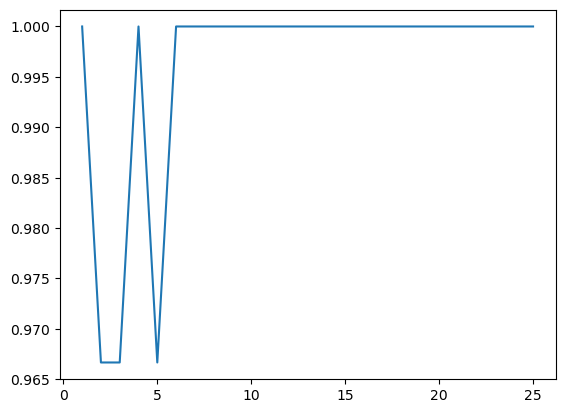

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)

In [11]:
scores_list

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

## Testing construction and searching runtime for different tree structures

In [12]:
# Use the train set to construct a tree
X_concatenate = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)

### KD-Tree

In [13]:
from kd_tree import KDTree

#### Construction Time

In [14]:
%%time
kd_tree = KDTree(X_concatenate[:20,:], iris.data.shape[1])
print('End')

End
CPU times: user 428 µs, sys: 130 µs, total: 558 µs
Wall time: 492 µs


In [15]:
%%time
kd_tree = KDTree(X_concatenate[:50,:], iris.data.shape[1])
print('End')

End
CPU times: user 418 µs, sys: 100 µs, total: 518 µs
Wall time: 504 µs


In [16]:
%%time
kd_tree = KDTree(X_concatenate[:80,:], iris.data.shape[1])
print('End')

End
CPU times: user 518 µs, sys: 187 µs, total: 705 µs
Wall time: 599 µs


In [17]:
%%time
kd_tree = KDTree(X_concatenate[:,:], iris.data.shape[1])
print('End')

End
CPU times: user 512 µs, sys: 74 µs, total: 586 µs
Wall time: 583 µs


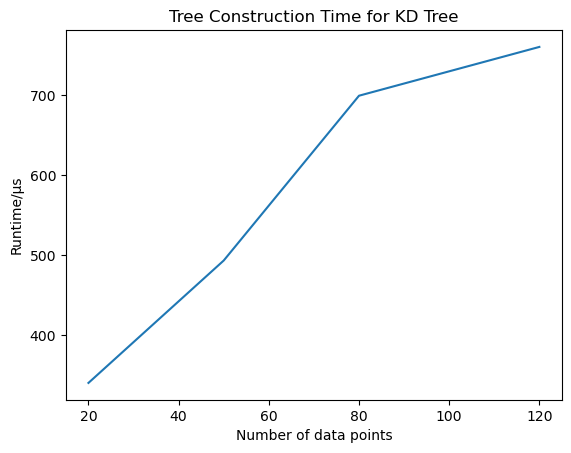

In [18]:
size = [20, 50, 80, 120]
runtime = [340, 493, 699, 760]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time for KD Tree')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/μs')
plt.plot(size, runtime)

#### kNN Runtime

In [19]:
kd_tree = KDTree(X_concatenate[:,:], iris.data.shape[1])
y_pred = np.zeros_like(y_test)

In [20]:
%%time
k = 1
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 1.81 ms, sys: 128 µs, total: 1.94 ms
Wall time: 1.92 ms


In [21]:
%%time
k = 3
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 2.61 ms, sys: 57 µs, total: 2.67 ms
Wall time: 2.67 ms


In [22]:
%%time
k = 5
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 3.79 ms, sys: 107 µs, total: 3.9 ms
Wall time: 3.89 ms


In [23]:
%%time
k = 7
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 5.53 ms, sys: 561 µs, total: 6.09 ms
Wall time: 5.73 ms


In [24]:
%%time
k = 10
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 6.06 ms, sys: 196 µs, total: 6.26 ms
Wall time: 6.18 ms


In [25]:
%%time
k = 13
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 7.34 ms, sys: 338 µs, total: 7.67 ms
Wall time: 7.57 ms


In [26]:
%%time
k = 16
for idx in range(X_test.shape[0]):
    pred = kd_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 7.8 ms, sys: 235 µs, total: 8.04 ms
Wall time: 7.92 ms


In [27]:
# Accuracy score
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
    for idx in range(X_test.shape[0]):
        votes = [0, 0, 0]
        pred = kd_tree.get_knn(X_test[idx], k)
        for vote in pred:
            votes[int(vote[-1])] += 1
        y_pred[idx] = np.argmax(votes)
        scores[k] = metrics.accuracy_score(y_test, y_pred)
        scores_list.append(metrics.accuracy_score(y_test, y_pred))

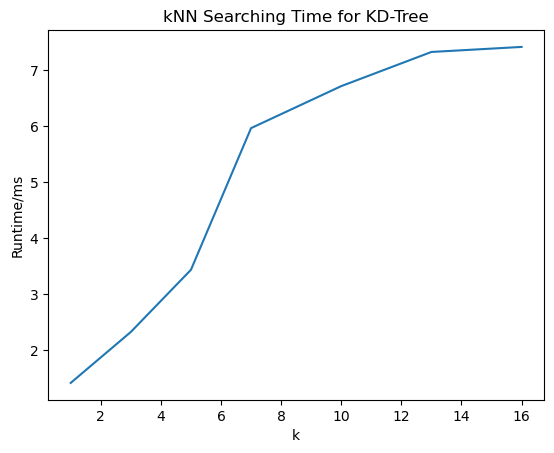

In [28]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime = [1.42, 2.33, 3.44, 5.97, 6.72, 7.33, 7.42]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time for KD-Tree')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime)

### Primary Axis Tree

In [29]:
from pa_tree import PATree

#### Construction Time

In [30]:
%%time
pa_tree = PATree(X_concatenate[:20,:], iris.data.shape[1])
print('End')

End
CPU times: user 1.21 ms, sys: 479 µs, total: 1.69 ms
Wall time: 1.35 ms


In [31]:
%%time
pa_tree = PATree(X_concatenate[:50,:], iris.data.shape[1])
print('End')

End
CPU times: user 2.44 ms, sys: 1.44 ms, total: 3.88 ms
Wall time: 2.62 ms


In [32]:
%%time
pa_tree = PATree(X_concatenate[:80,:], iris.data.shape[1])
print('End')

End
CPU times: user 3.99 ms, sys: 2.12 ms, total: 6.11 ms
Wall time: 4.34 ms


In [33]:
%%time
pa_tree = PATree(X_concatenate[:,:], iris.data.shape[1])
print('End')

End
CPU times: user 5.96 ms, sys: 2.5 ms, total: 8.45 ms
Wall time: 6.62 ms


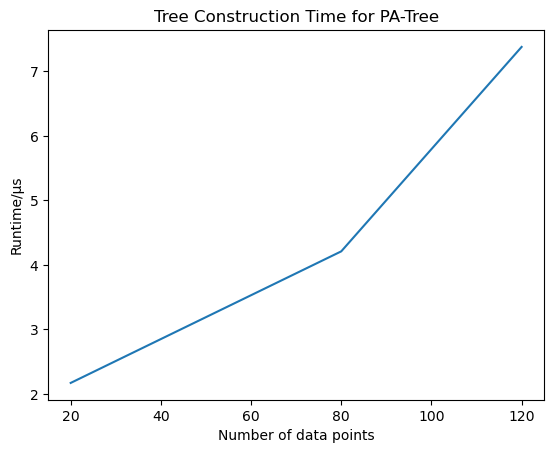

In [34]:
size = [20, 50, 80, 120]
runtime = [2.17, 3.19, 4.21, 7.38]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time for PA-Tree')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/μs')
plt.plot(size, runtime)

#### kNN Runtime

In [35]:
pa_tree = PATree(X_concatenate[:,:], iris.data.shape[1])
y_pred = np.zeros_like(y_test)

In [36]:
%%time
k = 1
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 1.89 ms, sys: 240 µs, total: 2.13 ms
Wall time: 2.13 ms


In [37]:
%%time
k = 3
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 2.65 ms, sys: 183 µs, total: 2.83 ms
Wall time: 2.73 ms


In [38]:
%%time
k = 5
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 4.03 ms, sys: 120 µs, total: 4.15 ms
Wall time: 4.16 ms


In [39]:
%%time
k = 7
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 4.38 ms, sys: 298 µs, total: 4.67 ms
Wall time: 4.53 ms


In [40]:
%%time
k = 10
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 5.85 ms, sys: 551 µs, total: 6.41 ms
Wall time: 6 ms


In [41]:
%%time
k = 13
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 6.17 ms, sys: 130 µs, total: 6.3 ms
Wall time: 6.25 ms


In [42]:
%%time
k = 16
for idx in range(X_test.shape[0]):
    pred = pa_tree.get_knn(X_test[idx], k)
print('End')

End
CPU times: user 7.91 ms, sys: 1.13 ms, total: 9.04 ms
Wall time: 8.14 ms


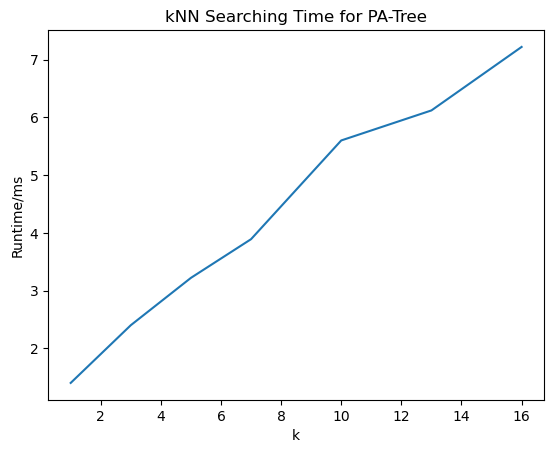

In [43]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime = [1.4, 2.4, 3.22, 3.89, 5.6, 6.12, 7.22]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time for PA-Tree')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime)

### PCA Tree

In [44]:
from pca_tree import PCATree

#### Construction Time

In [45]:
%%time
pca_tree = PCATree(X_concatenate[:20,:], iris.data.shape[1])
print('End')

End
CPU times: user 3.58 ms, sys: 1.64 ms, total: 5.22 ms
Wall time: 3.97 ms


In [46]:
%%time
pca_tree = PCATree(X_concatenate[:50,:], iris.data.shape[1])
print('End')

End
CPU times: user 7.92 ms, sys: 2.55 ms, total: 10.5 ms
Wall time: 8.7 ms


In [47]:
%%time
pca_tree = PCATree(X_concatenate[:80,:], iris.data.shape[1])
print('End')

End
CPU times: user 72.3 ms, sys: 6.55 ms, total: 78.9 ms
Wall time: 15.1 ms


In [48]:
%%time
pca_tree = PCATree(X_concatenate[:,:], iris.data.shape[1])
print('End')

End
CPU times: user 106 ms, sys: 3.98 ms, total: 110 ms
Wall time: 19.1 ms


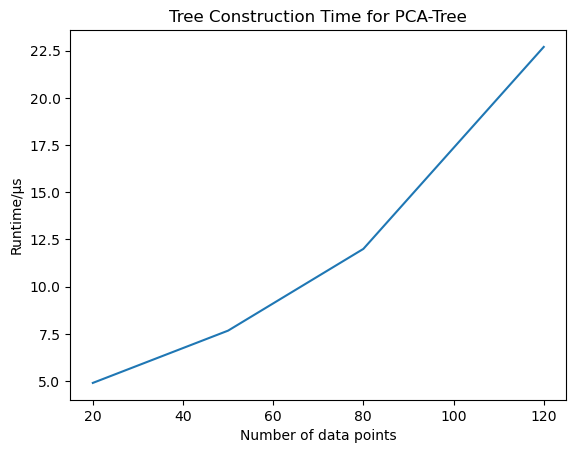

In [49]:
size = [20, 50, 80, 120]
runtime = [4.9, 7.67, 12, 22.7]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time for PCA-Tree')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/μs')
plt.plot(size, runtime)

#### kNN Runtime

In [50]:
pca_tree = PCATree(X_concatenate[:,:], iris.data.shape[1])
y_pred = np.zeros_like(y_test)

In [51]:
%%time
k = 1
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 2.15 ms, sys: 11 µs, total: 2.16 ms
Wall time: 2.16 ms


In [52]:
%%time
k = 3
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 5.89 ms, sys: 237 µs, total: 6.13 ms
Wall time: 6.22 ms


In [53]:
%%time
k = 5
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 5.68 ms, sys: 87 µs, total: 5.77 ms
Wall time: 5.78 ms


In [54]:
%%time
k = 7
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 6.78 ms, sys: 100 µs, total: 6.88 ms
Wall time: 6.89 ms


In [55]:
%%time
k = 10
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 9.14 ms, sys: 220 µs, total: 9.36 ms
Wall time: 9.39 ms


In [56]:
%%time
k = 13
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 10.5 ms, sys: 542 µs, total: 11 ms
Wall time: 10.7 ms


In [57]:
%%time
k = 16
for idx in range(X_test.shape[0]):
    pred = pca_tree.get_knn(X_test[idx], k)

CPU times: user 13.6 ms, sys: 667 µs, total: 14.3 ms
Wall time: 13.9 ms


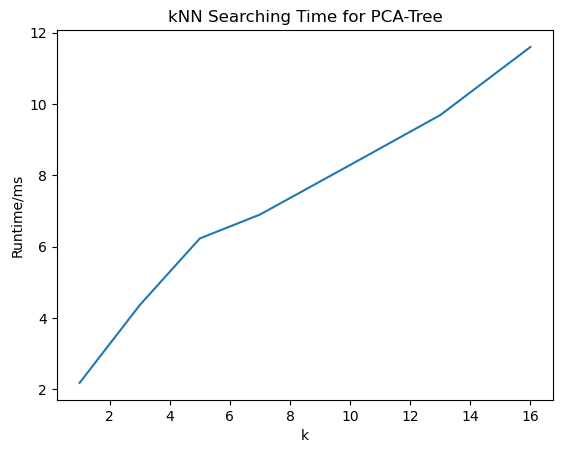

In [58]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime = [2.18, 4.36, 6.23, 6.9, 8.29, 9.69, 11.6]

%matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time for PCA-Tree')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime)

### Comparision of Construction Time

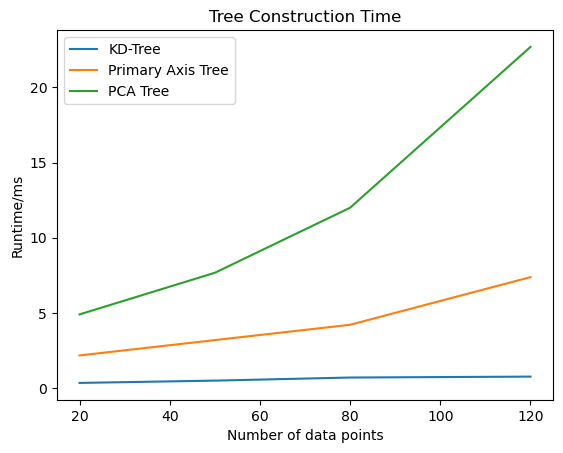

In [59]:
size = [20, 50, 80, 120]
runtime_kd_tree = [0.34, 0.493, 0.699, 0.76]
runtime_pa_tree = [2.17, 3.19, 4.21, 7.38]
runtime_pca_tree = [4.9, 7.67, 12, 22.7]

# %matplotlib inline
import matplotlib.pyplot as plt

plt.title('Tree Construction Time')
plt.xlabel('Number of data points')
plt.ylabel('Runtime/ms')
plt.plot(size, runtime_kd_tree, label='KD-Tree')
plt.plot(size, runtime_pa_tree, label='Primary Axis Tree')
plt.plot(size, runtime_pca_tree, label='PCA Tree')

plt.legend()
plt.savefig('tree_construction.png')

### Comparision of kNN Searching Time

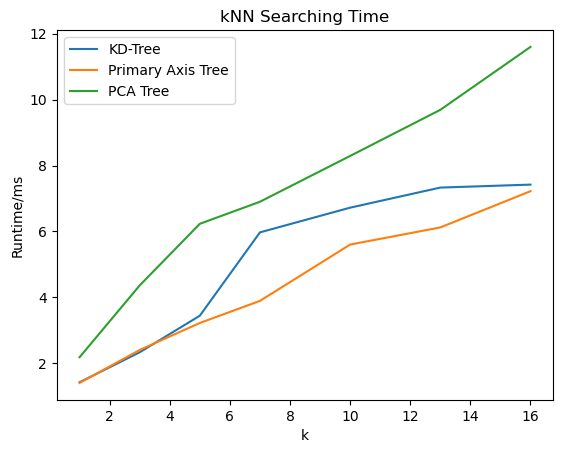

In [60]:
k = [1, 3, 5, 7, 10, 13, 16]
runtime_kd_tree = [1.42, 2.33, 3.44, 5.97, 6.72, 7.33, 7.42]
runtime_pa_tree = [1.4, 2.4, 3.22, 3.89, 5.6, 6.12, 7.22]
runtime_pca_tree = [2.18, 4.36, 6.23, 6.9, 8.29, 9.69, 11.6]

# %matplotlib inline
import matplotlib.pyplot as plt

plt.title('kNN Searching Time')
plt.xlabel('k')
plt.ylabel('Runtime/ms')
plt.plot(k, runtime_kd_tree, label='KD-Tree')
plt.plot(k, runtime_pa_tree, label='Primary Axis Tree')
plt.plot(k, runtime_pca_tree, label='PCA Tree')

plt.legend()
plt.savefig('kNN_search.png')

## Color Segmentation

In [62]:
import cv2
img = cv2.imread("figures/bridge_scaled.jpg")

In [63]:
img.shape

(760, 1352, 3)

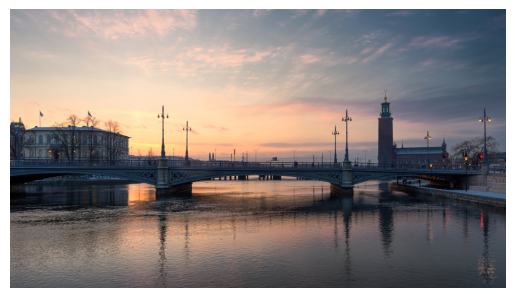

In [64]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [66]:
from kd_tree import KDTree
# Color space consisting of three colors
color_space = [[255, 0, 0],  # Red
               [238, 218, 194], # color of the sky
               [0, 255, 0],
               [45, 57, 69],
               [172, 143, 128],
               [80, 83, 90],
               [51, 76, 98],
               [20, 20, 30],
               [190, 148, 126],
               [0, 0, 255]]

kd_tree = KDTree(color_space, 3)

In [67]:
img_segment = img.copy()

for row in range(img_segment.shape[0]):
    for col in range(img_segment.shape[1]):
        img_segment[row][col] = kd_tree.get_nn(img[row][col])

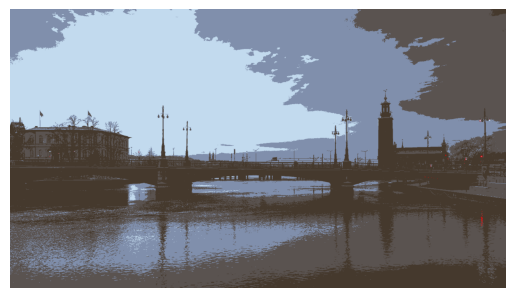

In [72]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img_segment, cv2.COLOR_BGR2RGB))